In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
import copy
gc.enable()

In [2]:
# set game to run and initialize 


problem_name = "2generals"
planning_horizon = 10
gametype = "stackelberg"
sota = False
num_iterations = 2

decpomdp = DecPOMDP(problem_name,horizon=planning_horizon)
PROBLEM.initialize(decpomdp)
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
belief_space= BeliefSpace(planning_horizon,0.02)
belief_space.monte_carlo_expansion()
# belief_space.add_samples(40)
print(belief_space.time_index_table)
belief_space.reset()
belief_space.expansion()
print(belief_space.time_index_table)

belief_space.size_at_horizon(2)

	Monte-Carlo belief expansion done with density = 0.02 , resulting belief space size = 6

{0: {0}, 1: {0, 1, 2, 4}, 2: {0, 1, 2, 3, 4, 5}, 3: {0, 1, 2, 3, 4, 5}, 4: {0, 1, 2, 3, 4, 5}, 5: {0, 1, 2, 3, 4, 5}, 6: {0, 1, 2, 3, 4, 5}, 7: {0, 1, 2, 3, 4, 5}, 8: {0, 1, 2, 3, 4, 5}, 9: {0, 1, 2, 3, 4, 5}, 10: set()}
	belief expansion to horizon 10 done with density = 0.02 , resulting belief space size = 5

{0: {0}, 1: {0, 1, 2}, 2: {0, 1, 2, 3, 4}, 3: {0, 1, 2, 3, 4}, 4: {0, 1, 2, 3, 4}, 5: {0, 1, 2, 3, 4}, 6: {0, 1, 2, 3, 4}, 7: {0, 1, 2, 3, 4}, 8: {0, 1, 2, 3, 4}, 9: {0, 1, 2, 3, 4}, 10: set()}


5

In [8]:
prob = PROBLEM.get_instance()
print(decpomdp.states)
print(decpomdp.joint_actions)
action = 1
state = 0
prob.REWARDS["generalsum"]

['s_small', 's_large']
[('observe', 'observe'), ('observe', 'attack'), ('attack', 'observe'), ('attack', 'attack')]


[array([[ -1.,  -1.],
        [-10., -10.],
        [-10., -10.],
        [  5., -20.]]),
 array([[  0., -17.],
        [-20.,   3.],
        [-12., -13.],
        [-13., -16.]])]

In [9]:
[np.array([[-2,-1],
  [-10,-10],
  [-11,-11],
  [5,-15]
  ]),
 np.array([[-1,-1],
  [-10,-10],
  [0,0],
  [15,-5]
  ])
]

[array([[ -2,  -1],
        [-10, -10],
        [-11, -11],
        [  5, -15]]),
 array([[ -1,  -1],
        [-10, -10],
        [  0,   0],
        [ 15,  -5]])]

In [11]:
[np.array([[-1,-1,-1,-2],
  [0,0,1,1],
  [-1,0,-1,0],
  [0,0,0,0]
  ]),
 np.array([[-1,-1,-1,-2],
  [-1,-1,0, 0,],
  [0,1,0,1],
  [0,0,0,0]
  ])
]

[array([[-1, -1, -1, -2],
        [ 0,  0,  1,  1],
        [-1,  0, -1,  0],
        [ 0,  0,  0,  0]]),
 array([[-1, -1, -1, -2],
        [-1, -1,  0,  0],
        [ 0,  1,  0,  1],
        [ 0,  0,  0,  0]])]

In [6]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations)
# experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


	Monte-Carlo belief expansion done with density = 0.2 , resulting belief space size = 4

Added samples to the beleif space, with density =0.04 , new belief space size = 6 with 2 new belief points
0 : {0} 
1 : {0, 1, 2, 3} 
2 : {0, 1, 2, 3, 4, 5} 
3 : {0, 1, 2, 3, 4, 5} 
4 : {0, 1, 2, 3, 4, 5} 
5 : {0, 1, 2, 3, 4, 5} 
6 : {0, 1, 2, 3, 4, 5} 
7 : {0, 1, 2, 3, 4, 5} 
8 : {0, 1, 2, 3, 4, 5} 
9 : {0, 1, 2, 3, 4, 5} 
			 Solving cooperative 2generals GAME Horizon 1 WITH SOTA = None , Belief space size = 4
iteration : 0

========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  -1.0 , follower = [-1. -1.]

			 Solving cooperative 2generals GAME Horizon 1 WITH SOTA = False , Belief space size = 4
iteration : 0

========== Backup at timestep 0 ==========
		belief id : 

KeyboardInterrupt: 

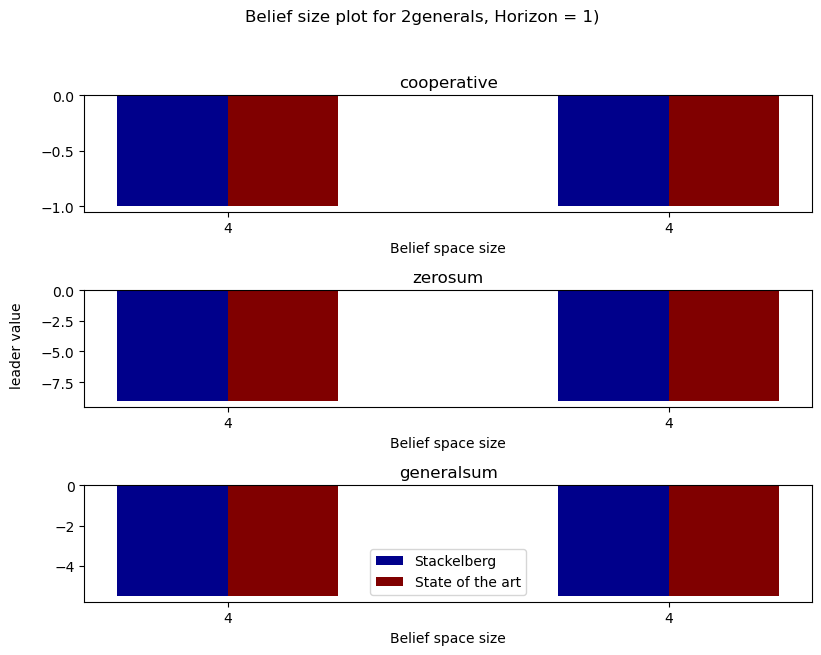

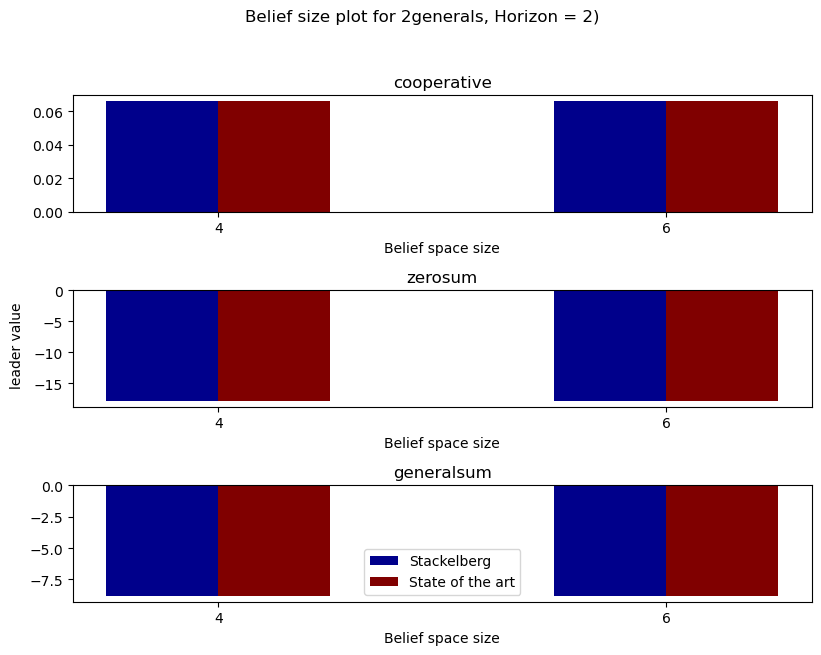

In [7]:
# run experiments 
experiment.run_experiments_decreasing_density(0.2)

In [ ]:
data = pd.DataFrame(experiment.database)
data[(data["gametype"]=="generalsum") & (data["horizon"]==1)]

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density
8,1,generalsum,Stackelberg,1,0.015605,4,30.0,"[70.0, -15.0]",0.20
9,1,generalsum,State of the Art,1,0.011920,4,30.0,"[70.0, -15.0]",0.20
10,1,generalsum,Stackelberg,2,0.012886,4,30.0,"[70.0, -15.0]",0.04
11,1,generalsum,State of the Art,2,0.013197,4,30.0,"[70.0, -15.0]",0.04


In [ ]:
experiment.comparison_matrix


,Strong Leader Policy,Weak Leader Policy
Strong Follower Policy,"(300.0, 275.0)","[150.0, 137.5]"
Blind Follower Policy,"[150.0, 137.5]","(300.0, 275.0)"


In [ ]:
tables = experiment.generate_summary_table()
tables

State of the Art                                           \
                         time leader value iteration number_of_beliefs   
dectiger(1)          0.011920         30.0         2                 4   
dectiger(2)          0.066531         60.0         2                 4   
dectiger(3)          0.138424         90.0         2                 6   
dectiger(4)          0.231408        120.0         2                 4   
dectiger(5)          0.276915        150.0         2                 5   
dectiger(6)          0.343582        180.0         2                 4   
dectiger(7)          0.535718        210.0         2                 5   
dectiger(8)          0.633965        240.0         2                 5   
dectiger(9)          0.729793        270.0         2                 4   
dectiger(10)         0.739860        300.0         2                 4   

             Stackelberg                                           
                    time leader value iteration number_of_beliefs  
dectiger(1)     0.015605         30.0         2                 4  
dectiger(2)     0.069609         60.0         2                 4  
dectiger(3)     0.138000         90.0         2                 6  
dectiger(4)     0.219404        120.0         2                 4  
dectiger(5)     0.273576        150.0         2                 5  
dectiger(6)     0.346472        180.0         2                 4  
dectiger(7)     0.529600        210.0         2                 5  
dectiger(8)     0.487468        240.0         2                 5  
dectiger(9)     0.591655        270.0         2                 4  
dectiger(10)    0.648455        300.0         2                 4

In [ ]:
experiment.generate_comparison_tables()
# current_data = experiment.database[(experiment.database["SOTA"]=="Stackelberg")&(experiment.database["horizon"]==2)&(experiment.database["gametype"]=="generalsum")]
# current_data

cooperative                           \
  State of the Art Leader Value Stackelberg Leader Value   
0                           9.0                      9.0   
1                          18.0                     18.0   
2                          27.0                     27.0   
3                          36.0                     36.0   
4                          45.0                     45.0   
5                          54.0                     54.0   
6                          63.0                     63.0   
7                          72.0                     72.0   
8                          81.0                     81.0   
9                          90.0                     90.0   

                        zerosum                           \
  State of the Art Leader Value Stackelberg Leader Value   
0                         -75.0                    -75.0   
1                        -150.0                   -150.0   
2                        -225.0                   -225.0   
3                        -300.0                   -300.0   
4                        -375.0                   -375.0   
5                        -450.0                   -450.0   
6                        -525.0                   -525.0   
7                        -600.0                   -600.0   
8                        -675.0                   -675.0   
9                        -750.0                   -750.0   

                     generalsum                           
  State of the Art Leader Value Stackelberg Leader Value  
0                          30.0                     30.0  
1                          60.0                     60.0  
2                          90.0                     90.0  
3                         120.0                    120.0  
4                         150.0                    150.0  
5                         180.0                    180.0  
6                         210.0                    210.0  
7                         240.0                    240.0  
8                         270.0                    270.0  
9                         300.0                    300.0

In [ ]:
data = experiment.database[(experiment.database["SOTA"]==True)&(experiment.database["horizon"]==1)&(experiment.database["gametype"]==gametype)]
data

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density


In [ ]:
experiment.generate_summary_table()

State of the Art                                           \
                         time leader value iteration number_of_beliefs   
dectiger(1)          0.011920         30.0         2                 4   
dectiger(2)          0.066531         60.0         2                 4   
dectiger(3)          0.138424         90.0         2                 6   
dectiger(4)          0.231408        120.0         2                 4   
dectiger(5)          0.276915        150.0         2                 5   
dectiger(6)          0.343582        180.0         2                 4   
dectiger(7)          0.535718        210.0         2                 5   
dectiger(8)          0.633965        240.0         2                 5   
dectiger(9)          0.729793        270.0         2                 4   
dectiger(10)         0.739860        300.0         2                 4   

             Stackelberg                                           
                    time leader value iteration number_of_beliefs  
dectiger(1)     0.015605         30.0         2                 4  
dectiger(2)     0.069609         60.0         2                 4  
dectiger(3)     0.138000         90.0         2                 6  
dectiger(4)     0.219404        120.0         2                 4  
dectiger(5)     0.273576        150.0         2                 5  
dectiger(6)     0.346472        180.0         2                 4  
dectiger(7)     0.529600        210.0         2                 5  
dectiger(8)     0.487468        240.0         2                 5  
dectiger(9)     0.591655        270.0         2                 4  
dectiger(10)    0.648455        300.0         2                 4

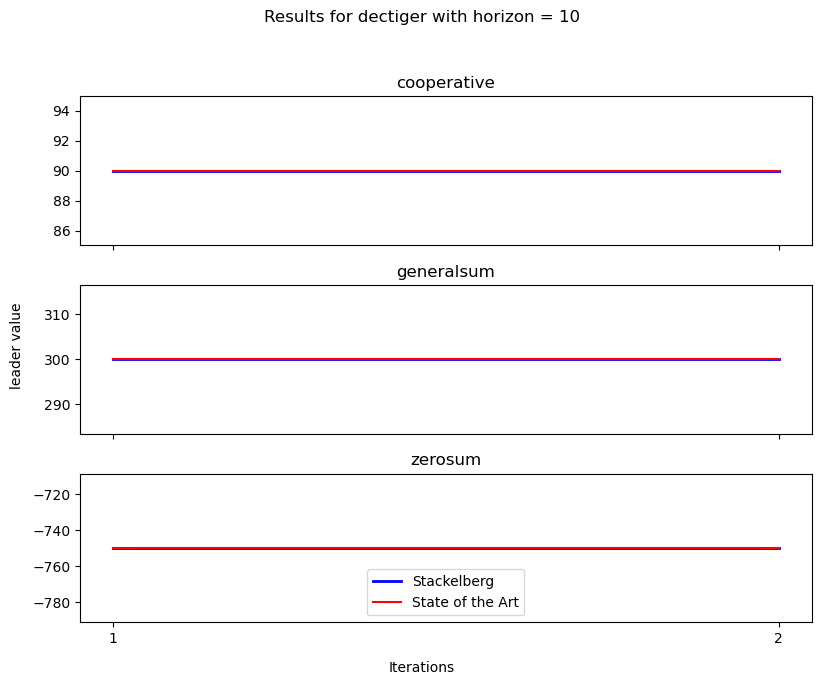

In [ ]:
experiment.plots()

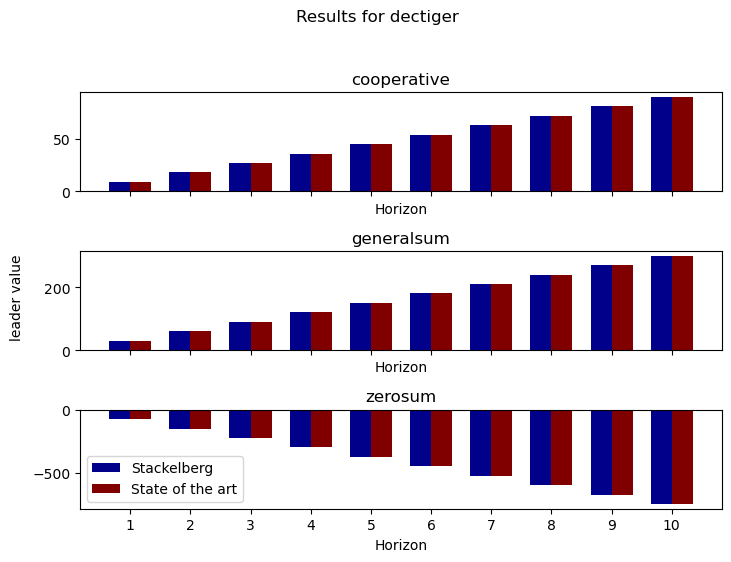

In [ ]:
experiment.horizon_value_plot(densities=True)

belief size : [4, 4],
 sota values = [90.0, 90.0],
 non-sota-values = [90.0, 90.0]  
belief size : [4, 4],
 sota values = [300.0, 300.0],
 non-sota-values = [300.0, 300.0]  
belief size : [4, 4],
 sota values = [-750.0, -750.0],
 non-sota-values = [-750.0, -750.0]  


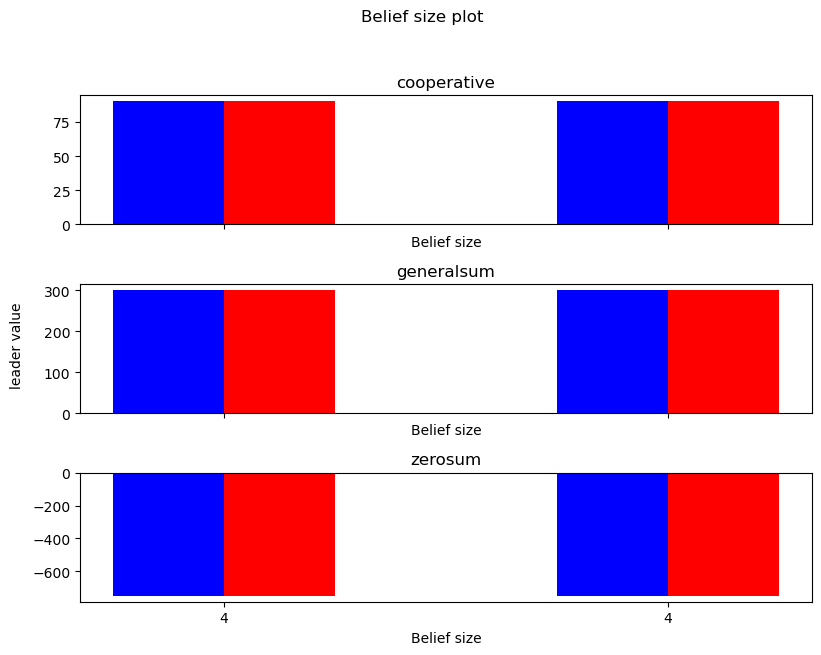

In [ ]:
# experiment.density_plot()
data = experiment.database[(experiment.database["gametype"]=="generalsum") & (experiment.database["horizon"]==experiment.planning_horizon)]
data["number_of_beliefs"]

fig, axs = plt.subplots(3, 1, figsize=(9, 7), sharex=True)
colors = ['blue', 'red']
bar_width = 0.25
for idx,gametype in enumerate(["cooperative","generalsum","zerosum"]):
    data = experiment.database[(experiment.database["gametype"]==gametype) & (experiment.database["horizon"]==experiment.planning_horizon)]
    belief_sizes = [value for value in  data["number_of_beliefs"][data["SOTA"]=="State of the Art"]]
    sota_leader_values = [value for value in  data["leader values"][data["SOTA"]=="State of the Art"]]
    non_sota_leader_values = [value for value in  data["leader values"][data["SOTA"]=="Stackelberg"]]
    axs[idx].set_title(f"{gametype}") 


    print(f"belief size : {belief_sizes},\n sota values = {sota_leader_values},\n non-sota-values = {non_sota_leader_values}  ")
    x = np.arange(len(belief_sizes))  # Generating x-values for bars

    # Plotting
    axs[idx].bar(x - bar_width / 2, sota_leader_values, bar_width, label='Stackelberg', color=colors[0])
    axs[idx].bar(x + bar_width / 2, non_sota_leader_values, bar_width, label='State of the art', color=colors[1])

    # Setting x-axis ticks and labels
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(belief_sizes)
    axs[idx].set_xlabel("Belief size")



fig.suptitle(f"Belief size plot")
fig.text(0.05, 0.5, 'leader value', ha='center', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust the rect parameter as needed
plt.show()

# experiment.generate_comparison_tables()

In [ ]:
experiment.generate_summary_table()

State of the Art                                           \
                         time leader value iteration number_of_beliefs   
dectiger(1)          0.011920         30.0         2                 4   
dectiger(2)          0.066531         60.0         2                 4   
dectiger(3)          0.138424         90.0         2                 6   
dectiger(4)          0.231408        120.0         2                 4   
dectiger(5)          0.276915        150.0         2                 5   
dectiger(6)          0.343582        180.0         2                 4   
dectiger(7)          0.535718        210.0         2                 5   
dectiger(8)          0.633965        240.0         2                 5   
dectiger(9)          0.729793        270.0         2                 4   
dectiger(10)         0.739860        300.0         2                 4   

             Stackelberg                                           
                    time leader value iteration number_of_beliefs  
dectiger(1)     0.015605         30.0         2                 4  
dectiger(2)     0.069609         60.0         2                 4  
dectiger(3)     0.138000         90.0         2                 6  
dectiger(4)     0.219404        120.0         2                 4  
dectiger(5)     0.273576        150.0         2                 5  
dectiger(6)     0.346472        180.0         2                 4  
dectiger(7)     0.529600        210.0         2                 5  
dectiger(8)     0.487468        240.0         2                 5  
dectiger(9)     0.591655        270.0         2                 4  
dectiger(10)    0.648455        300.0         2                 4

belief size: [4 4],
 sota values: [90. 90.],
 non-sota values: [90. 90.]
belief size: [4 4],
 sota values: [-750. -750.],
 non-sota values: [-750. -750.]
belief size: [4 4],
 sota values: [300. 300.],
 non-sota values: [300. 300.]


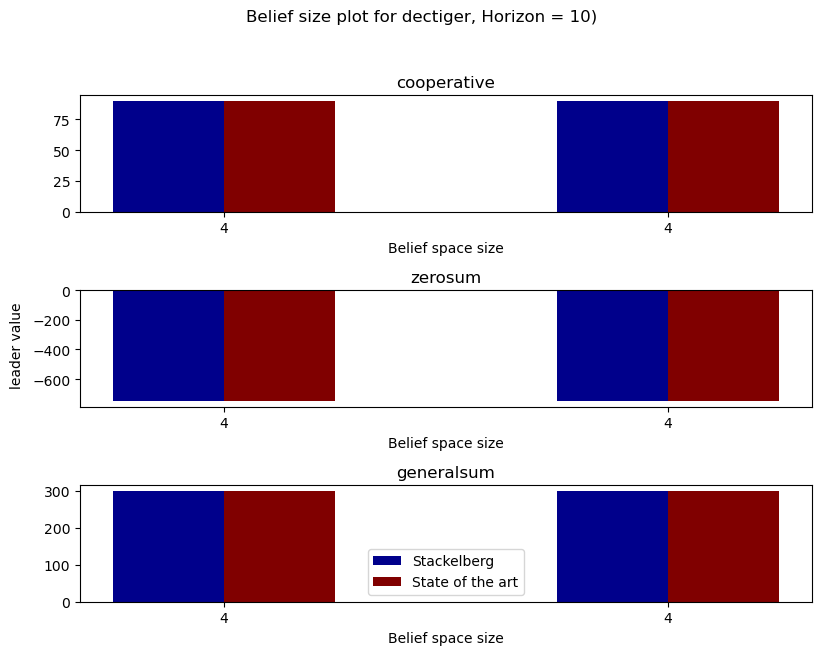

In [ ]:
experiment.density_plot()

In [ ]:
class ClassA:
    def __init__(self, shared_data):
        self.shared_data = shared_data

    def update_shared_data(self, key, value):
        self.shared_data.add_samples(20)


class ClassB:
    def __init__(self, shared_data):
        self.shared_data = shared_data

    def read_shared_data(self):
        print(f"ClassB reads shared data: {self.shared_data.time_index_table}")


# Create a shared dictionary
shared_dict = BeliefSpace(3,0.2)

# Instantiate ClassA and ClassB with the shared dictionary
a = ClassA(shared_dict)
b = ClassB(shared_dict)

# Update shared data using ClassA
a.update_shared_data('key1', 'value1')

# Read shared data using ClassB
b.read_shared_data()


Added samples to the beleif space, with density =0.2 , new belief space size = 4 with 3 new belief points
0 : {0} 
1 : {0, 1, 2, 3} 
2 : {0, 1, 2, 3} 
ClassB reads shared data: {0: {0}, 1: {0, 1, 2, 3}, 2: {0, 1, 2, 3}, 3: set()}
